In [7]:
import pandas as pd

In [8]:
# Lire seulement les en-têtes du fichier
headers = pd.read_csv('data.csv', nrows=0).columns.tolist()

# Afficher les noms de colonnes
headers


['id_mutation',
 'date_mutation',
 'numero_disposition',
 'nature_mutation',
 'valeur_fonciere',
 'adresse_numero',
 'adresse_suffixe',
 'adresse_nom_voie',
 'adresse_code_voie',
 'code_postal',
 'code_commune',
 'nom_commune',
 'code_departement',
 'ancien_code_commune',
 'ancien_nom_commune',
 'id_parcelle',
 'ancien_id_parcelle',
 'numero_volume',
 'lot1_numero',
 'lot1_surface_carrez',
 'lot2_numero',
 'lot2_surface_carrez',
 'lot3_numero',
 'lot3_surface_carrez',
 'lot4_numero',
 'lot4_surface_carrez',
 'lot5_numero',
 'lot5_surface_carrez',
 'nombre_lots',
 'code_type_local',
 'type_local',
 'surface_reelle_bati',
 'nombre_pieces_principales',
 'code_nature_culture',
 'nature_culture',
 'code_nature_culture_speciale',
 'nature_culture_speciale',
 'surface_terrain',
 'longitude',
 'latitude']

In [9]:
# Définir les types pour toutes les colonnes
dtypes = {col: str for col in headers}  # Par défaut, tout en string

# Spécifier les types pour les colonnes numériques et de date
numeric_columns = ['valeur_fonciere', 'lot_1_surface_carrez', 'lot_2_surface_carrez', 
                   'lot_3_surface_carrez', 'lot_4_surface_carrez', 'lot_5_surface_carrez', 
                   'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
                   'longitude', 'latitude']

for col in numeric_columns:
    if col in dtypes:
        dtypes[col] = float

# La date de mutation sera traitée séparément
if 'date_mutation' in dtypes:
    del dtypes['date_mutation']

# Charger les données avec les types spécifiés
df = pd.read_csv('data.csv', dtype=dtypes, parse_dates=['date_mutation'])

# Vérifier les types de données
df.dtypes

id_mutation                             object
date_mutation                   datetime64[ns]
numero_disposition                      object
nature_mutation                         object
valeur_fonciere                        float64
adresse_numero                          object
adresse_suffixe                         object
adresse_nom_voie                        object
adresse_code_voie                       object
code_postal                             object
code_commune                            object
nom_commune                             object
code_departement                        object
ancien_code_commune                     object
ancien_nom_commune                      object
id_parcelle                             object
ancien_id_parcelle                      object
numero_volume                           object
lot1_numero                             object
lot1_surface_carrez                     object
lot2_numero                             object
lot2_surface_

In [10]:
# Conversion des colonnes de surface des lots
lot_surface_columns = ['lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez', 'lot5_surface_carrez']
for col in lot_surface_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Conversion de nombre_lots
df['nombre_lots'] = pd.to_numeric(df['nombre_lots'], errors='coerce')

# Vérifier les types de données
df.dtypes


id_mutation                             object
date_mutation                   datetime64[ns]
numero_disposition                      object
nature_mutation                         object
valeur_fonciere                        float64
adresse_numero                          object
adresse_suffixe                         object
adresse_nom_voie                        object
adresse_code_voie                       object
code_postal                             object
code_commune                            object
nom_commune                             object
code_departement                        object
ancien_code_commune                     object
ancien_nom_commune                      object
id_parcelle                             object
ancien_id_parcelle                      object
numero_volume                           object
lot1_numero                             object
lot1_surface_carrez                    float64
lot2_numero                             object
lot2_surface_

In [11]:
df = df.rename(columns={
    'id_mutation': 'id_transaction',
    'date_mutation': 'date_vente',
    'numero_disposition': 'num_disposition',
    'nature_mutation': 'type_vente',
    'valeur_fonciere': 'prix',
    'adresse_numero': 'num_rue',
    'adresse_suffixe': 'suffixe_rue',
    'adresse_nom_voie': 'nom_rue',
    'adresse_code_voie': 'code_voie',
    'code_postal': 'code_postal',
    'code_commune': 'code_commune',
    'nom_commune': 'ville',
    'code_departement': 'departement',
    'ancien_code_commune': 'ancien_code_commune',
    'ancien_nom_commune': 'ancienne_ville',
    'id_parcelle': 'id_parcelle',
    'ancien_id_parcelle': 'ancien_id_parcelle',
    'numero_volume': 'num_volume',
    'lot1_numero': 'num_lot1',
    'lot1_surface_carrez': 'surface_carrez_lot1',
    'lot2_numero': 'num_lot2',
    'lot2_surface_carrez': 'surface_carrez_lot2',
    'lot3_numero': 'num_lot3',
    'lot3_surface_carrez': 'surface_carrez_lot3',
    'lot4_numero': 'num_lot4',
    'lot4_surface_carrez': 'surface_carrez_lot4',
    'lot5_numero': 'num_lot5',
    'lot5_surface_carrez': 'surface_carrez_lot5',
    'nombre_lots': 'nb_lots',
    'code_type_local': 'code_type_bien',
    'type_local': 'type_bien',
    'surface_reelle_bati': 'surface_habitable',
    'nombre_pieces_principales': 'nb_pieces',
    'code_nature_culture': 'code_nature_terrain',
    'nature_culture': 'nature_terrain',
    'code_nature_culture_speciale': 'code_nature_terrain_special',
    'nature_culture_speciale': 'nature_terrain_special',
    'surface_terrain': 'surface_terrain',
    'longitude': 'longitude',
    'latitude': 'latitude'
})

# Vérifier les nouveaux noms de colonnes
df.columns

Index(['id_transaction', 'date_vente', 'num_disposition', 'type_vente', 'prix',
       'num_rue', 'suffixe_rue', 'nom_rue', 'code_voie', 'code_postal',
       'code_commune', 'ville', 'departement', 'ancien_code_commune',
       'ancienne_ville', 'id_parcelle', 'ancien_id_parcelle', 'num_volume',
       'num_lot1', 'surface_carrez_lot1', 'num_lot2', 'surface_carrez_lot2',
       'num_lot3', 'surface_carrez_lot3', 'num_lot4', 'surface_carrez_lot4',
       'num_lot5', 'surface_carrez_lot5', 'nb_lots', 'code_type_bien',
       'type_bien', 'surface_habitable', 'nb_pieces', 'code_nature_terrain',
       'nature_terrain', 'code_nature_terrain_special',
       'nature_terrain_special', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [12]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentages = (df.isnull().sum() / len(df)) * 100

In [13]:
# Afficher les pourcentages de valeurs manquantes triés par ordre décroissant
print("Pourcentage de valeurs manquantes par colonne :")
print(missing_percentages.sort_values(ascending=False))

# Définir le seuil pour la suppression des colonnes (90% de valeurs manquantes)
threshold = 90

# Identifier les colonnes à conserver
columns_to_keep = missing_percentages[missing_percentages <= threshold].index

# Créer une nouvelle DataFrame avec seulement les colonnes à conserver
df = df[columns_to_keep].copy()

print(f"\nColonnes conservées : {list(df.columns)}")

# Traiter les valeurs manquantes pour les colonnes numériques importantes
numeric_columns = ['prix', 'surface_habitable', 'surface_terrain', 'longitude', 'latitude']
for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Traiter nb_pieces
if 'nb_pieces' in df.columns:
    df['nb_pieces'] = df['nb_pieces'].fillna(df['nb_pieces'].median()).round()

# Traiter les colonnes catégorielles
categorical_columns = ['type_bien', 'nature_terrain', 'code_nature_terrain']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna('Non spécifié')

# Traiter code_postal
if 'code_postal' in df.columns:
    df['code_postal'] = df['code_postal'].fillna(df['code_postal'].mode()[0])

# Traiter num_rue
if 'num_rue' in df.columns:
    df['num_rue'] = df['num_rue'].fillna(0)

# Traiter nom_rue
if 'nom_rue' in df.columns:
    df['nom_rue'] = df['nom_rue'].fillna('Non spécifié')

# Traiter code_type_bien
if 'code_type_bien' in df.columns:
    df['code_type_bien'] = df['code_type_bien'].fillna('NS')

# Vérifier à nouveau les valeurs manquantes
print("\nValeurs manquantes restantes :")
print(df.isnull().sum().sort_values(ascending=False).head())

print(f"\nNombre de lignes : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")

Pourcentage de valeurs manquantes par colonne :
ancien_id_parcelle             99.999866
ancienne_ville                 99.998175
ancien_code_commune            99.998175
surface_carrez_lot5            99.975288
surface_carrez_lot4            99.924095
num_volume                     99.778213
num_lot5                       99.773411
surface_carrez_lot3            99.673438
num_lot4                       99.463993
num_lot3                       98.282321
surface_carrez_lot2            97.084603
suffixe_rue                    95.579024
code_nature_terrain_special    95.548141
nature_terrain_special         95.548141
surface_carrez_lot1            91.143130
num_lot2                       90.342567
num_lot1                       69.109218
surface_habitable              68.028967
nb_pieces                      42.579363
code_type_bien                 42.513063
type_bien                      42.513063
num_rue                        37.983501
surface_terrain                31.416808
nature_te

In [14]:
# Pour num_lot1
df['num_lot1'] = df['num_lot1'].fillna('Pas de lot')

# Pour code_voie
df['code_voie'] = df['code_voie'].fillna('Inconnu')

In [15]:
df.dtypes

id_transaction                 object
date_vente             datetime64[ns]
num_disposition                object
type_vente                     object
prix                          float64
num_rue                        object
nom_rue                        object
code_voie                      object
code_postal                    object
code_commune                   object
ville                          object
departement                    object
id_parcelle                    object
num_lot1                       object
nb_lots                         int64
code_type_bien                 object
type_bien                      object
surface_habitable             float64
nb_pieces                     float64
code_nature_terrain            object
nature_terrain                 object
surface_terrain               float64
longitude                     float64
latitude                      float64
dtype: object

In [16]:
# 1. Aperçu général des données
df.describe()

,date_vente,prix,nb_lots,surface_habitable,nb_pieces,surface_terrain,longitude,latitude
count,3727005,3.727005e+06,3.727005e+06,3.727005e+06,3.727005e+06,3.727005e+06,3.727005e+06,3.727005e+06
mean,2023-07-03 08:31:58.763619328,6.124996e+05,4.356270e-01,8.724365e+01,1.420534e+00,2.254261e+03,2.272291e+00,4.615287e+01
min,2023-01-01 00:00:00,1.000000e-01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.314571e+01,-2.138615e+01
25%,2023-04-03 00:00:00,6.330000e+04,0.000000e+00,7.400000e+01,0.000000e+00,4.270000e+02,3.434250e-01,4.468915e+01
50%,2023-06-30 00:00:00,1.606000e+05,0.000000e+00,7.400000e+01,1.000000e+00,6.410000e+02,2.352615e+00,4.671836e+01
75%,2023-10-02 00:00:00,3.000000e+05,1.000000e+00,7.400000e+01,2.000000e+00,1.026000e+03,4.473857e+00,4.863909e+01
max,2023-12-31 00:00:00,7.620000e+08,1.500000e+02,1.995470e+05,9.500000e+01,4.653206e+06,5.582781e+01,5.108192e+01
std,NaN,5.130155e+06,8.497163e-01,4.030485e+02,1.601666e+00,1.060172e+04,6.226706e+00,5.551352e+00


In [17]:
df.head()

,id_transaction,date_vente,num_disposition,type_vente,prix,num_rue,nom_rue,code_voie,code_postal,code_commune,...,nb_lots,code_type_bien,type_bien,surface_habitable,nb_pieces,code_nature_terrain,nature_terrain,surface_terrain,longitude,latitude
0,2023-1,2023-01-05,000001,Vente,1070000.0,184,ALL DES HETRES,0124,01630,01354,...,1,3,Dépendance,74.0,0.0,Non spécifié,Non spécifié,641.0,6.019949,46.247458
1,2023-1,2023-01-05,000001,Vente,1070000.0,159,ALL DES HETRES,0124,01630,01354,...,1,3,Dépendance,74.0,0.0,Non spécifié,Non spécifié,641.0,6.020204,46.247228
2,2023-1,2023-01-05,000001,Vente,1070000.0,159,ALL DES HETRES,0124,01630,01354,...,1,2,Appartement,233.0,8.0,Non spécifié,Non spécifié,641.0,6.020204,46.247228
3,2023-2,2023-01-03,000001,Vente,152200.0,2914,RTE DE PONCIN,0107,01450,01404,...,0,1,Maison,64.0,3.0,S,sols,988.0,5.438273,46.129859
4,2023-3,2023-01-05,000001,Vente,269000.0,427,CHE DE L'AUBEPIN,0040,01800,01361,...,0,1,Maison,73.0,3.0,S,sols,835.0,5.225844,45.853513


In [18]:
df['type_bien'].value_counts(dropna=False)

type_bien
Non spécifié                                1584464
Dépendance                                   944255
Maison                                       586728
Appartement                                  496268
Local industriel. commercial ou assimilé     115290
Name: count, dtype: int64

In [19]:
# Nombre de lignes avant suppression
print(f"Nombre de lignes avant suppression : {len(df)}")

# Suppression des biens non spécifiés
df = df[df['type_bien'] != 'Non spécifié']

# Nombre de lignes après suppression
print(f"Nombre de lignes après suppression : {len(df)}")

# Vérification de la nouvelle distribution des types de biens
print(df['type_bien'].value_counts())

Nombre de lignes avant suppression : 3727005
Nombre de lignes après suppression : 2142541
type_bien
Dépendance                                  944255
Maison                                      586728
Appartement                                 496268
Local industriel. commercial ou assimilé    115290
Name: count, dtype: int64


In [20]:
df['type_bien'].value_counts(dropna=False)

type_bien
Dépendance                                  944255
Maison                                      586728
Appartement                                 496268
Local industriel. commercial ou assimilé    115290
Name: count, dtype: int64

In [21]:
# Statistiques descriptives mises à jour
df.describe()

# Statistiques par type de bien
stats_by_type = df.groupby('type_bien').agg({
    'prix': ['mean', 'median', 'min', 'max'],
    'surface_habitable': ['mean', 'median', 'min', 'max'],
    'nb_pieces': ['mean', 'median', 'min', 'max']
})
stats_by_type

prix                  \
                                                  mean    median   min   
type_bien                                                                
Appartement                               9.244093e+05  183650.0  0.15   
Dépendance                                6.326136e+05  187800.0  0.15   
Local industriel. commercial ou assimilé  2.034509e+06  253000.0  0.15   
Maison                                    3.250008e+05  210000.0  1.00   

                                                      surface_habitable  \
                                                  max              mean   
type_bien                                                                 
Appartement                               762000000.0         55.992959   
Dépendance                                157200000.0         73.999930   
Local industriel. commercial ou assimilé  762000000.0        439.691526   
Maison                                    144700000.0        101.499893   

                                                               nb_pieces  \
                                         median  min       max      mean   
type_bien                                                                  
Appartement                                53.0  1.0     720.0  2.556236   
Dépendance                                 74.0  8.0      74.0  0.000068   
Local industriel. commercial ou assimilé   77.0  1.0  199547.0  0.018926   
Maison                                     93.0  1.0    3160.0  4.157039   

                                                            
                                         median  min   max  
type_bien                                                   
Appartement                                 2.0  0.0  78.0  
Dépendance                                  0.0  0.0   1.0  
Local industriel. commercial ou assimilé    0.0  0.0   1.0  
Maison                                      4.0  0.0  95.0

In [22]:
# Filtrer le DataFrame pour ne garder que les maisons et les appartements
df_filtered = df[df['type_bien'].isin(['Maison', 'Appartement'])]

# Vérifier le nombre de lignes avant et après le filtrage
print(f"Nombre de lignes avant filtrage : {len(df)}")
print(f"Nombre de lignes après filtrage : {len(df_filtered)}")

# Vérifier la distribution des types de biens restants
print(df_filtered['type_bien'].value_counts())

# Remplacer le DataFrame original par le DataFrame filtré
df = df_filtered

# Libérer de la mémoire
del df_filtered

Nombre de lignes avant filtrage : 2142541
Nombre de lignes après filtrage : 1082996
type_bien
Maison         586728
Appartement    496268
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\diabo\AppData\Local\Temp\ipykernel_1709588\413132860.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prix_median_m2 = subset.groupby('departement', group_keys=False).apply(lambda x: x['prix'].median() / x['surface_habitable'].median()).sort_values(ascending=False)


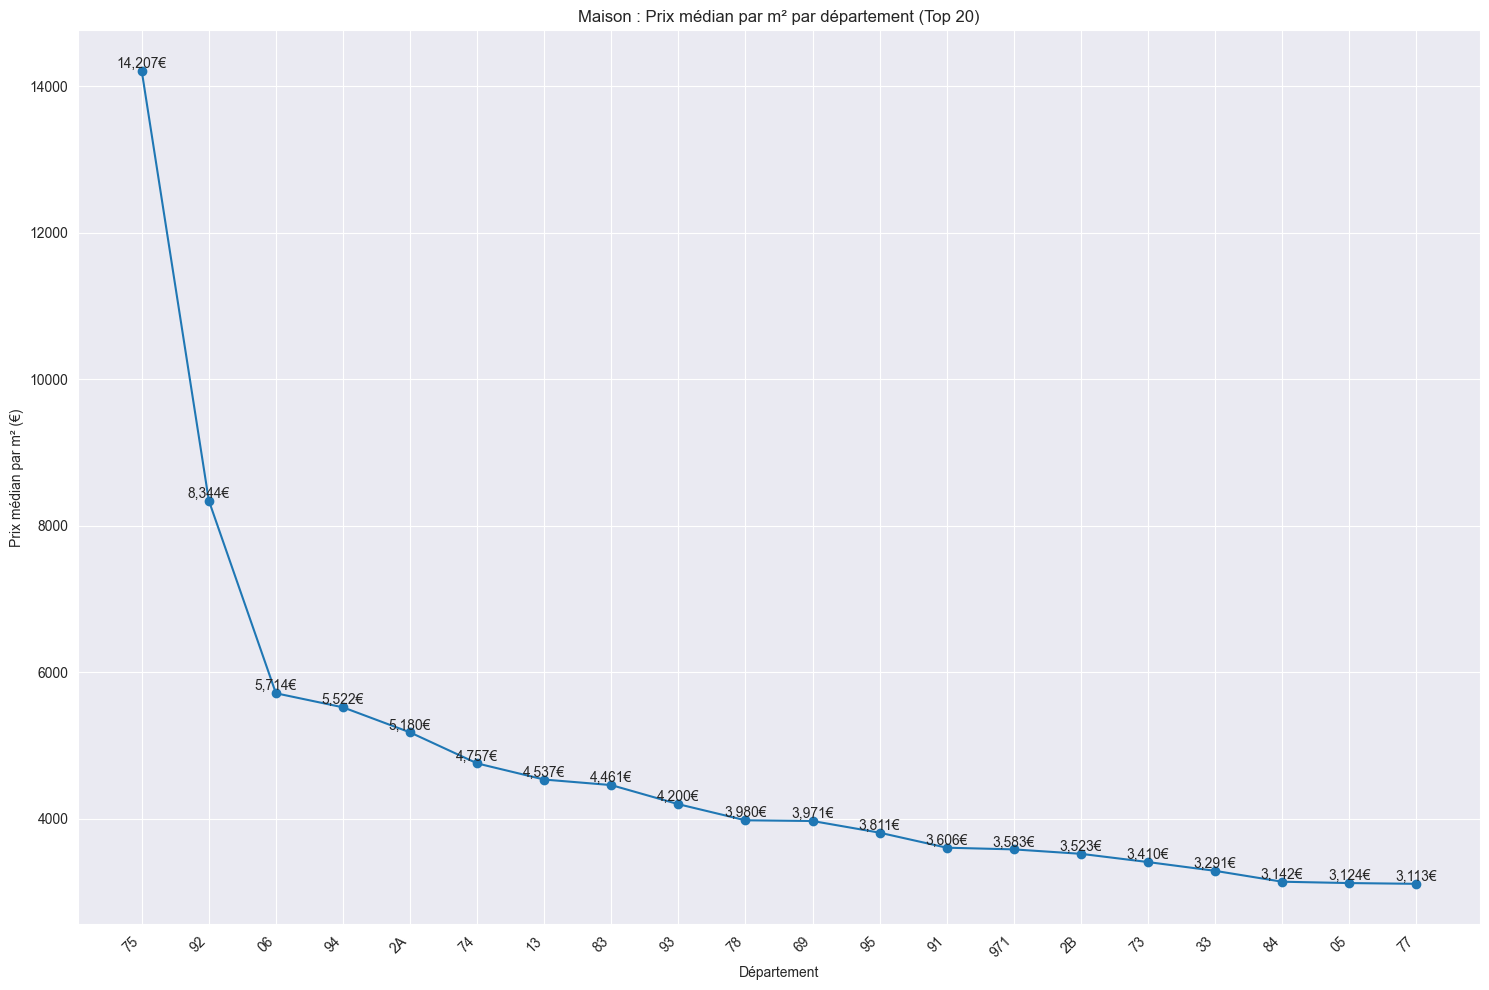


Statistiques pour Maison:
       surface_habitable          prix
count      550768.000000  5.507680e+05
mean          103.129191  2.972595e+05
std            45.249485  3.219077e+05
min             9.000000  5.000000e+04
25%            75.000000  1.400000e+05
50%            95.000000  2.200000e+05
75%           122.000000  3.400000e+05
max           500.000000  5.000000e+06

Prix médian par m² pour les 10 départements les plus chers:
departement
75    14207.042254
92     8344.000000
06     5714.285714
94     5522.222222
2A     5180.000000
74     4756.862745
13     4536.521739
83     4460.825000
93     4200.000000
78     3980.392157
dtype: float64

Exemples de transactions pour le département le plus cher:
              prix  surface_habitable departement
3682141   538480.0               69.0          75
3692900  3800000.0              180.0          75
3707860  3300000.0              284.0          75
3711188   785000.0               39.0          75
3667047  1320000.0              15

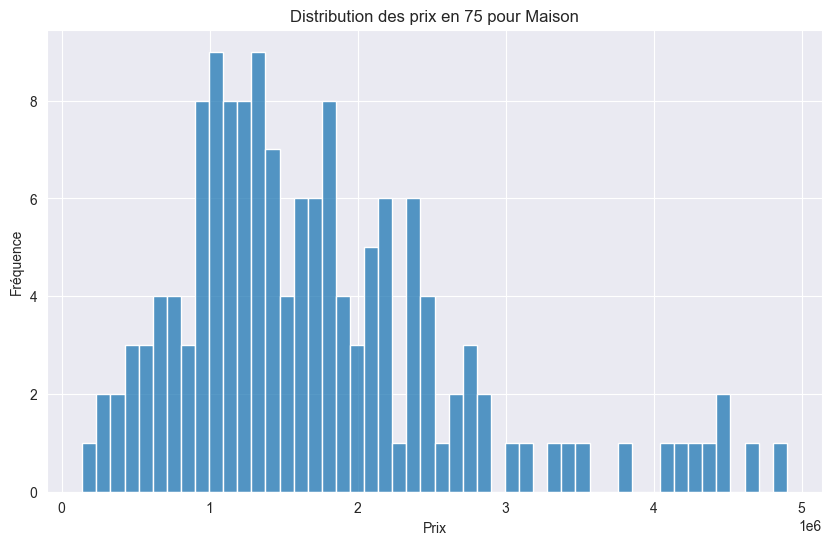

C:\Users\diabo\AppData\Local\Temp\ipykernel_1709588\413132860.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prix_median_m2 = subset.groupby('departement', group_keys=False).apply(lambda x: x['prix'].median() / x['surface_habitable'].median()).sort_values(ascending=False)


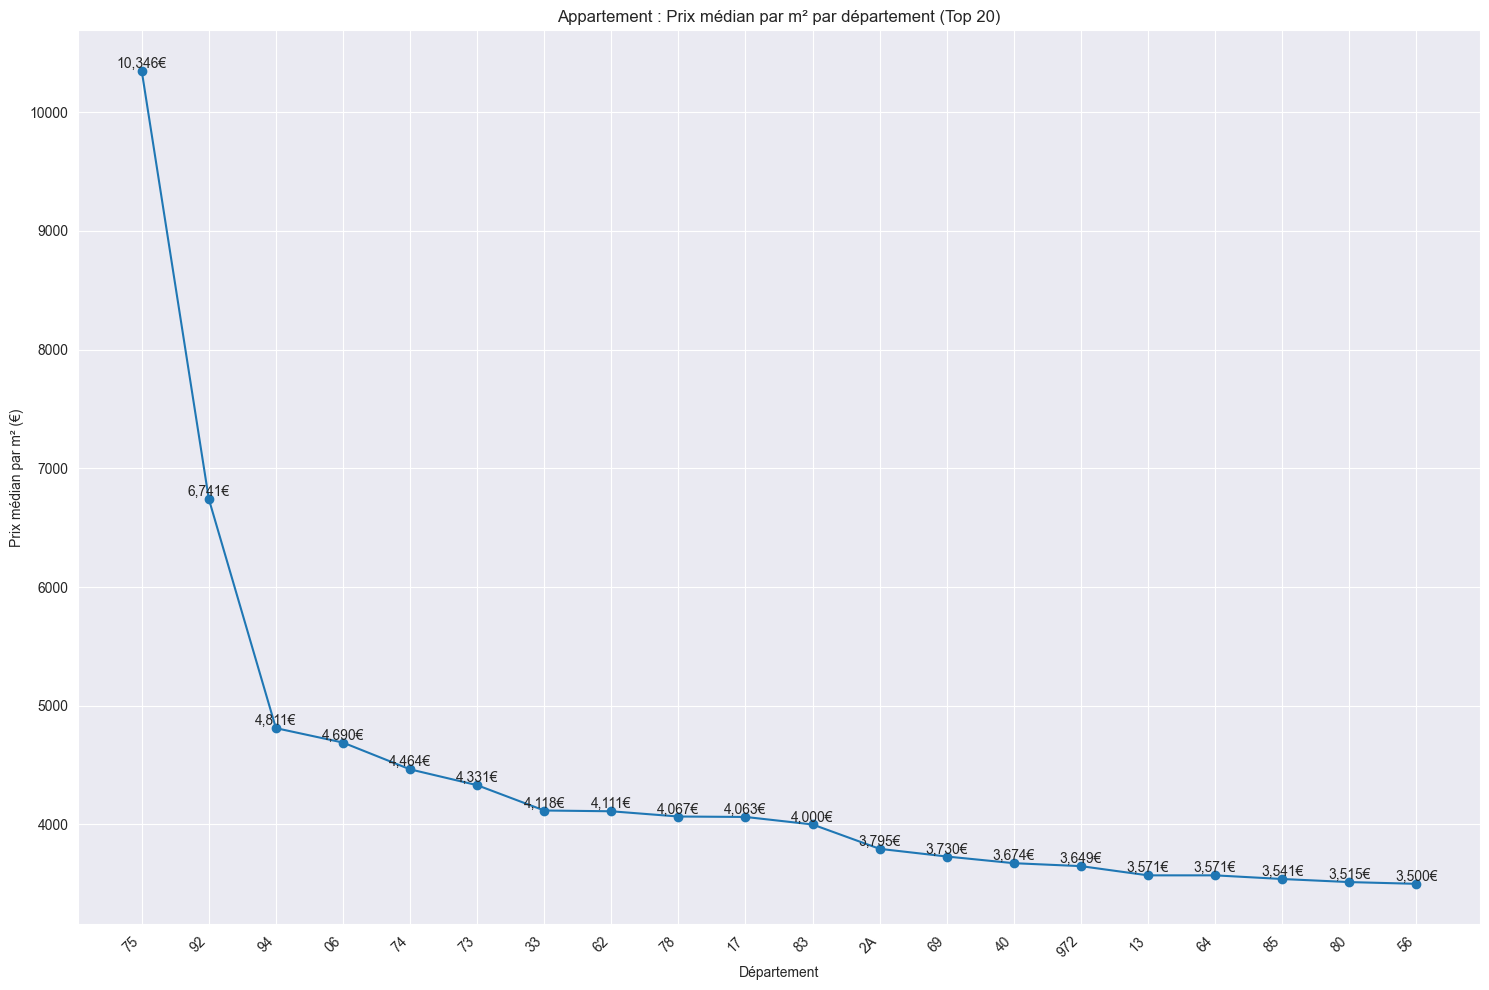


Statistiques pour Appartement:
       surface_habitable          prix
count      451445.000000  4.514450e+05
mean           56.391939  3.290628e+05
std            27.914596  4.921499e+05
min             9.000000  5.000000e+04
25%            36.000000  1.220000e+05
50%            53.000000  1.890000e+05
75%            71.000000  3.200000e+05
max           480.000000  5.000000e+06

Prix médian par m² pour les 10 départements les plus chers:
departement
75    10345.833333
92     6740.740741
94     4811.320755
06     4689.705882
74     4464.285714
73     4330.833333
33     4117.647059
62     4111.111111
78     4066.949153
17     4063.333333
dtype: float64

Exemples de transactions pour le département le plus cher:
              prix  surface_habitable departement
3700826   225000.0               33.0          75
3700949   600000.0               43.0          75
3704266   710000.0               70.0          75
3679933  4300000.0               24.0          75
3687214   740000.0           

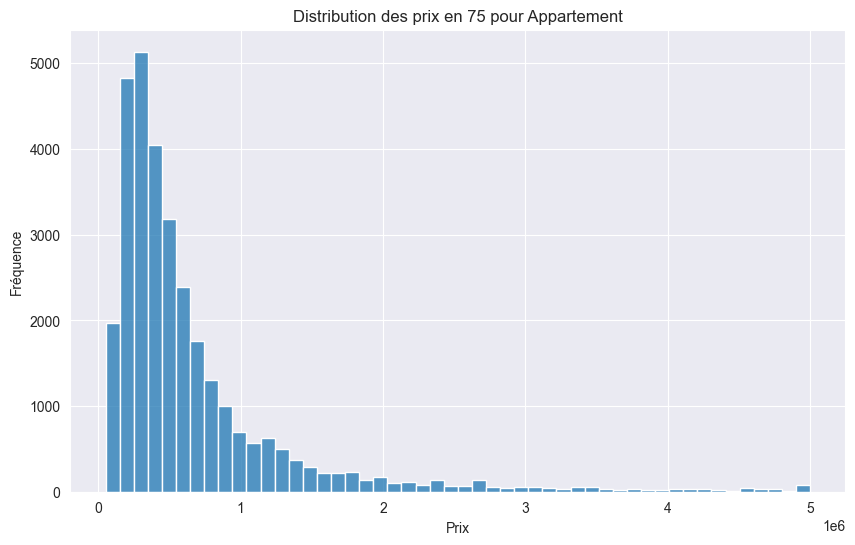

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def nettoyer_donnees(df):
    # Convertir prix et surface_habitable en numérique, en ignorant les erreurs
    df['prix'] = pd.to_numeric(df['prix'], errors='coerce')
    df['surface_habitable'] = pd.to_numeric(df['surface_habitable'], errors='coerce')
    
    # Filtrer les valeurs aberrantes
    df_clean = df[(df['prix'] >= 50000) & (df['prix'] <= 5000000) & 
                  (df['surface_habitable'] >= 9) & (df['surface_habitable'] <= 500)]
    
    return df_clean

def calculer_prix_median_m2(df, type_bien):
    subset = df[df['type_bien'] == type_bien]
    # Exclure explicitement la colonne de groupement
    prix_median_m2 = subset.groupby('departement', group_keys=False).apply(lambda x: x['prix'].median() / x['surface_habitable'].median()).sort_values(ascending=False)
    return prix_median_m2

def plot_m2_prix_departement(df, type_bien):
    df_clean = nettoyer_donnees(df)
    prix_median_m2 = calculer_prix_median_m2(df_clean, type_bien)
    
    # Sélectionner les 20 premiers départements
    top_20_departements = prix_median_m2.head(20)
    
    # Créer le graphique
    plt.figure(figsize=(15, 10))
    plt.plot(top_20_departements.index, top_20_departements.values, marker='o')
    
    plt.xlabel('Département')
    plt.ylabel('Prix médian par m² (€)')
    plt.title(f'{type_bien} : Prix médian par m² par département (Top 20)')
    
    plt.xticks(rotation=45, ha='right')
    
    for i, v in enumerate(top_20_departements):
        plt.text(i, v, f'{v:,.0f}€', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

    print(f"\nStatistiques pour {type_bien}:")
    print(df_clean[df_clean['type_bien'] == type_bien][['surface_habitable', 'prix']].describe())
    print(f"\nPrix médian par m² pour les 10 départements les plus chers:")
    print(prix_median_m2.head(10))

    # Afficher quelques exemples de transactions
    print("\nExemples de transactions pour le département le plus cher:")
    dept_plus_cher = prix_median_m2.index[0]
    print(df_clean[(df_clean['departement'] == dept_plus_cher) & (df_clean['type_bien'] == type_bien)].sample(5)[['prix', 'surface_habitable', 'departement']])

    # Histogramme des prix pour le département le plus cher
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_clean[(df_clean['departement'] == dept_plus_cher) & (df_clean['type_bien'] == type_bien)], x='prix', bins=50)
    plt.title(f'Distribution des prix en {dept_plus_cher} pour {type_bien}')
    plt.xlabel('Prix')
    plt.ylabel('Fréquence')
    plt.show()

# Créer un graphique pour chaque type de bien
for bien_type in ['Maison', 'Appartement']:
    plot_m2_prix_departement(df, bien_type)


In [25]:
print(df[df['departement'] == '971'][['prix', 'surface_habitable']].describe())

               prix  surface_habitable
count  4.526000e+03        4526.000000
mean   1.160432e+07          64.560981
std    1.407608e+07          34.865293
min    1.140000e+02          11.000000
25%    1.551000e+05          45.000000
50%    4.750000e+05          54.000000
75%    3.000000e+07          76.000000
max    3.000000e+07         565.000000


In [26]:
# import folium
# from folium.plugins import MarkerCluster

# def create_map(df, type_bien):
#    df_clean = df[df['type_bien'] == type_bien].dropna(subset=['latitude', 'longitude'])
#   m = folium.Map(location=[46.603354, 1.888334], zoom_start=6)
#
#    marker_cluster = MarkerCluster().add_to(m)
#
#    for idx, row in df_clean.iterrows():
#        folium.Marker(location=[row['latitude'], row['longitude']],
#                      popup=f"Prix: {row['prix']}€, Surface: {row['surface_habitable']}m²").add_to(marker_cluster)

#   return m

# Créer une carte pour les maisons
# maison_map = create_map(df, 'Maison')
# maison_map.save("maison_map.html")

# Créer une carte pour les appartements
# appartement_map = create_map(df, 'Appartement')
# appartement_map.save("appartement_map.html")


C:\Users\diabo\AppData\Local\Temp\ipykernel_1709588\344386468.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_94['prix_m2'] = df_94['prix'] / df_94['surface_habitable']


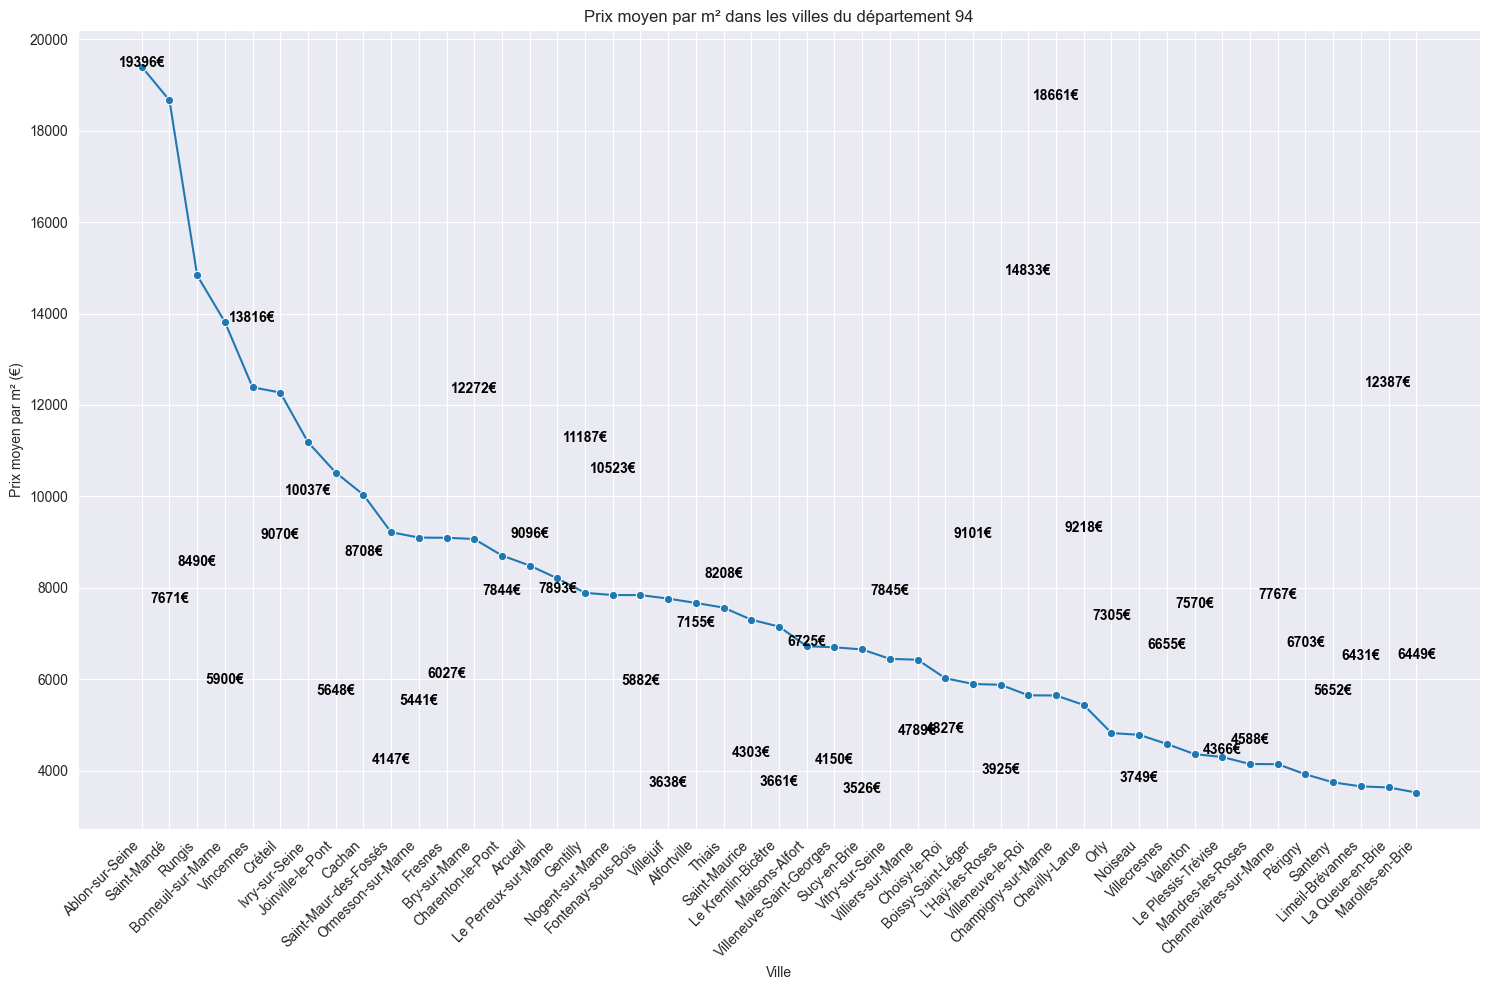

In [27]:
# Nettoyer les données
df_clean = nettoyer_donnees(df)

# Filtrer les données pour le département 94
df_94 = df_clean[df_clean['departement'] == '94']

# Ajouter une colonne pour le prix par m²
df_94['prix_m2'] = df_94['prix'] / df_94['surface_habitable']

# Calculer le prix moyen par m² pour chaque ville
prix_m2_mean = df_94.groupby('ville')['prix_m2'].mean().reset_index()

# Ordonner les villes par prix moyen par m²
prix_m2_mean = prix_m2_mean.sort_values(by='prix_m2', ascending=False)

# 1. Line plot des prix moyens par m² en fonction des villes avec annotations
plt.figure(figsize=(15, 10))
sns.lineplot(data=prix_m2_mean, x='ville', y='prix_m2', marker='o')
plt.title('Prix moyen par m² dans les villes du département 94')
plt.xlabel('Ville')
plt.ylabel('Prix moyen par m² (€)')
plt.xticks(rotation=45, ha='right')

# Ajouter les annotations pour chaque point
for i, row in prix_m2_mean.iterrows():
    plt.text(i, row['prix_m2'], f"{row['prix_m2']:.0f}€", horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show()

C:\Users\diabo\AppData\Local\Temp\ipykernel_1709588\4248681797.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_94['prix_m2'] = df_94['prix'] / df_94['surface_habitable']


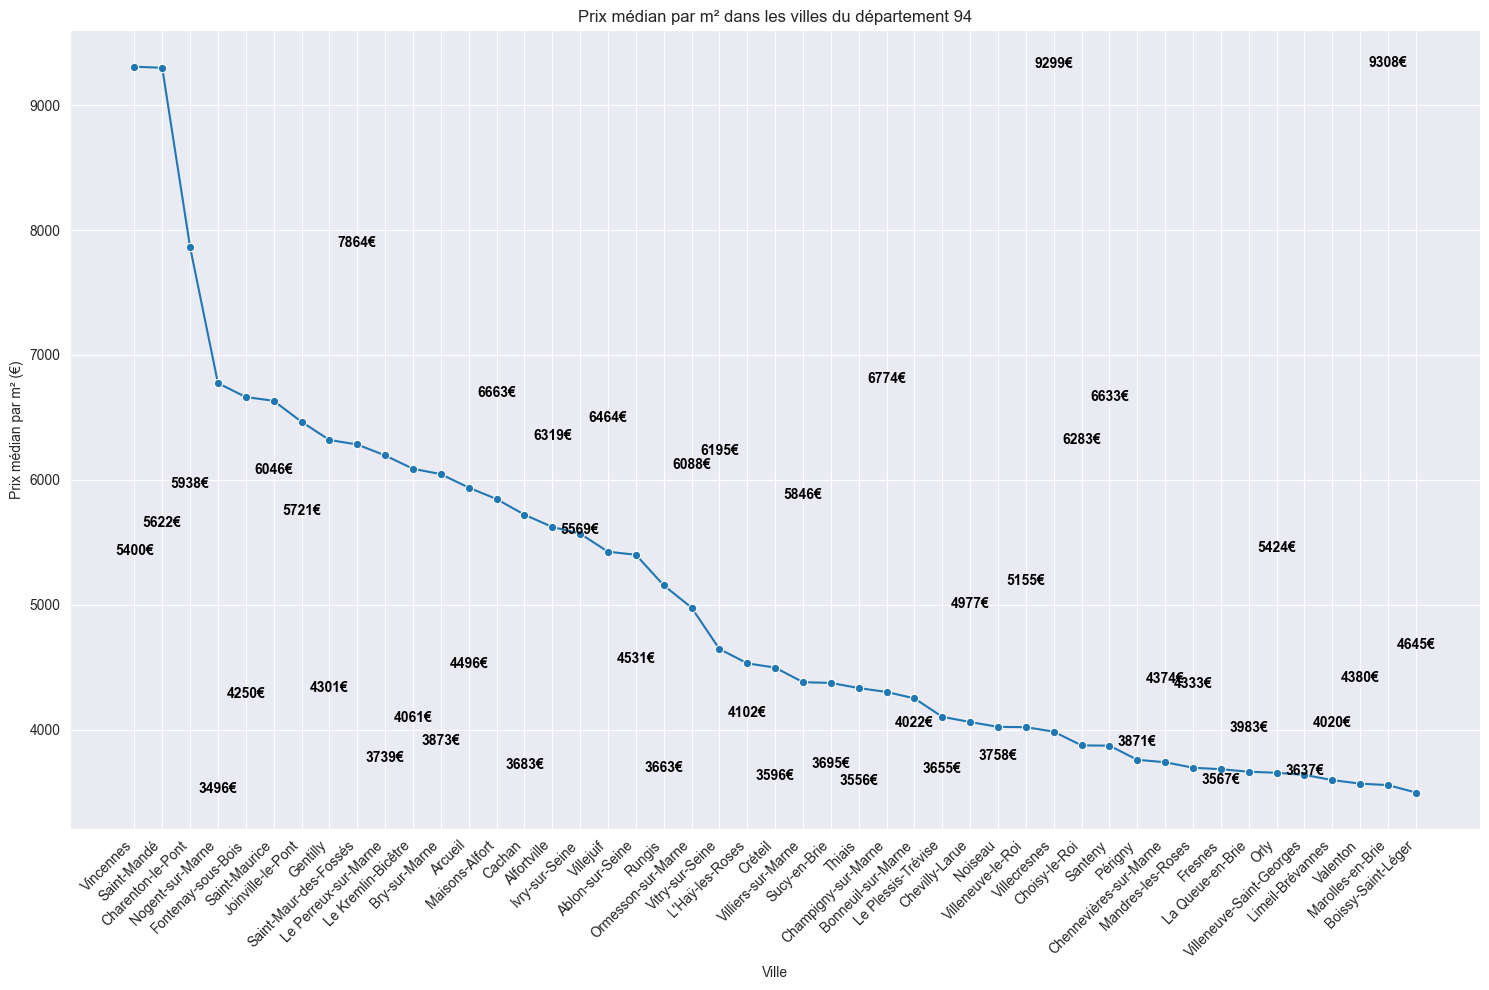

In [28]:
# Nettoyer les données
def nettoyer_donnees(df):
    # Convertir prix et surface_habitable en numérique, en ignorant les erreurs
    df['prix'] = pd.to_numeric(df['prix'], errors='coerce')
    df['surface_habitable'] = pd.to_numeric(df['surface_habitable'], errors='coerce')
    
    # Filtrer les valeurs aberrantes
    df_clean = df[(df['prix'] >= 50000) & (df['prix'] <= 5000000) & 
                  (df['surface_habitable'] >= 9) & (df['surface_habitable'] <= 500)]
    
    return df_clean

# Nettoyer les données
df_clean = nettoyer_donnees(df)

# Filtrer les données pour le département 94
df_94 = df_clean[df_clean['departement'] == '94']

# Ajouter une colonne pour le prix par m²
df_94['prix_m2'] = df_94['prix'] / df_94['surface_habitable']

# Calculer le prix médian par m² pour chaque ville
prix_m2_median = df_94.groupby('ville')['prix_m2'].median().reset_index()

# Ordonner les villes par prix médian par m²
prix_m2_median = prix_m2_median.sort_values(by='prix_m2', ascending=False)

# 1. Line plot des prix médians par m² en fonction des villes avec annotations
plt.figure(figsize=(15, 10))
sns.lineplot(data=prix_m2_median, x='ville', y='prix_m2', marker='o')
plt.title('Prix médian par m² dans les villes du département 94')
plt.xlabel('Ville')
plt.ylabel('Prix médian par m² (€)')
plt.xticks(rotation=45, ha='right')

# Ajouter les annotations pour chaque point
for i, row in prix_m2_median.iterrows():
    plt.text(i, row['prix_m2'], f"{row['prix_m2']:.0f}€", horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show()

C:\Users\diabo\AppData\Local\Temp\ipykernel_1709588\153885491.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['ville'] = frequency_encoding(df_relevant['ville'])
C:\Users\diabo\AppData\Local\Temp\ipykernel_1709588\153885491.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['departement'] = frequency_encoding(df_relevant['departement'])
C:\Users\diabo\AppData\Local\Temp\ipykernel_1709588\153885491.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

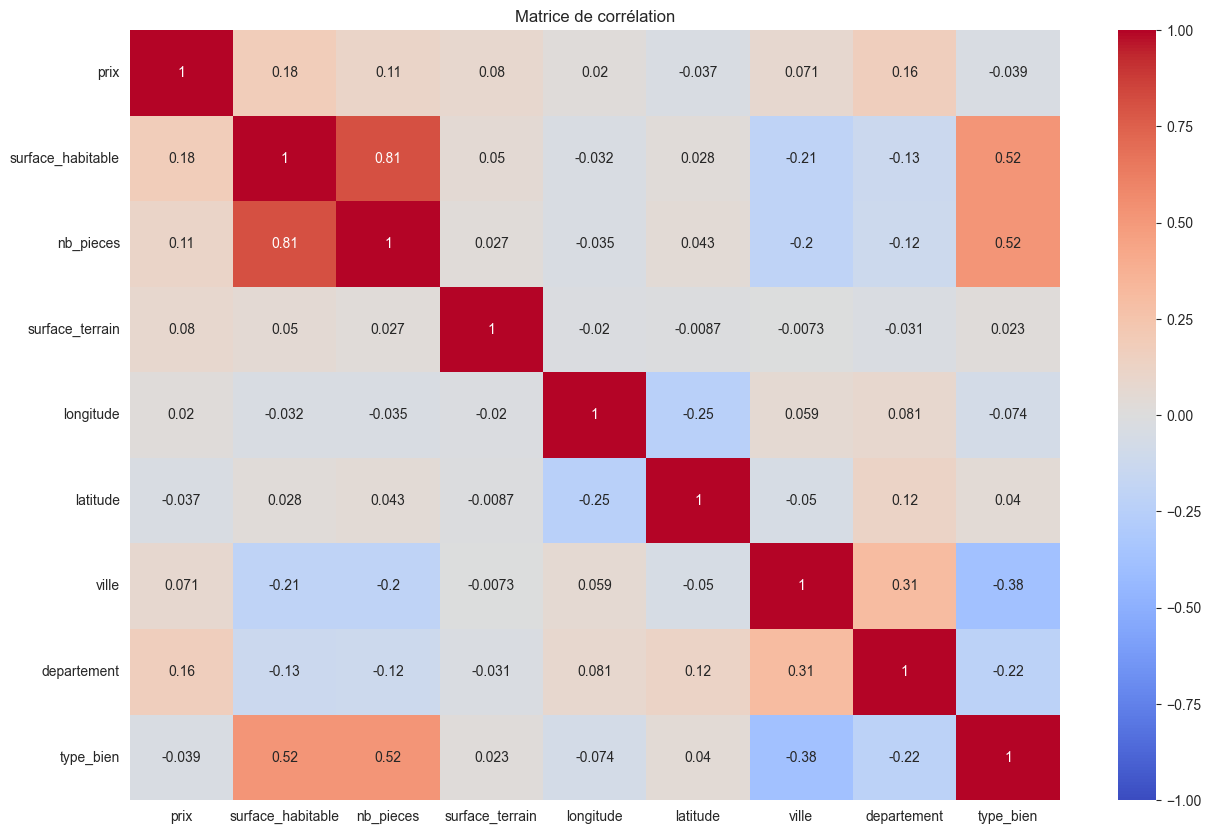

In [29]:
# Nettoyer les données
def nettoyer_donnees(df):
    df['prix'] = pd.to_numeric(df['prix'], errors='coerce')
    df['surface_habitable'] = pd.to_numeric(df['surface_habitable'], errors='coerce')
    df_clean = df[(df['prix'] >= 50000) & (df['prix'] <= 5000000) & 
                  (df['surface_habitable'] >= 9) & (df['surface_habitable'] <= 500)]
    return df_clean

# Fonction pour l'encodage de fréquence
def frequency_encoding(column):
    freq_encoding = column.value_counts().to_dict()
    return column.map(freq_encoding)

# Nettoyer les données
df_clean = nettoyer_donnees(df)

# Filtrer les colonnes pertinentes pour l'analyse
df_relevant = df_clean[['prix', 'surface_habitable', 'nb_pieces', 'surface_terrain', 
                        'longitude', 'latitude', 'ville', 'departement', 'type_bien']]

# Appliquer l'encodage de fréquence
df_relevant['ville'] = frequency_encoding(df_relevant['ville'])
df_relevant['departement'] = frequency_encoding(df_relevant['departement'])
df_relevant['type_bien'] = frequency_encoding(df_relevant['type_bien'])

# Calcul de la matrice de corrélation
correlation_matrix = df_relevant.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()